In [2]:
import numpy as np
n = np.random.randint(2,13,size=7)
print(n)

[ 3  6  9 11  5 12 10]


In [3]:
mean = sum(n)/len(n)
print(mean)
#np.mean(n)

8.0


In [4]:
#np.median(n)
if len(n)%2==0:
    num = len(n)//2
    median = (n[num]+n[num+1])/2
else:
    num = len(n)//2
    median = n[num]
print(median)

11


In [5]:
import pandas as pd
from scipy.stats import skew
n = [4,5,6,7,8,5]
mode = max(n, key=n.count)
print(mode)

5


In [6]:
skw=skew(n)
print(skw)

0.30531626975805215


In [7]:
Range=max(n)-min(n)
print(Range)

4


In [8]:
# Calculate the first quartile (Q1)
Q1 = np.percentile(n, 25)
# Calculate the third quartile (Q3)
Q3 = np.percentile(n, 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

print("First Quartile (Q1):", Q1)
print("Third Quartile (Q3):", Q3)
print("Interquartile Range (IQR):", IQR)


First Quartile (Q1): 5.0
Third Quartile (Q3): 6.75
Interquartile Range (IQR): 1.75


In [9]:
import statistics as st
print(np.var(n))#Compute the variance

1.8055555555555556


In [10]:
print(np.std(n))#Compute the standard deviation

1.3437096247164249


In [11]:
print(st.stdev(n))

1.4719601443879744


# Probability

In [12]:
die_roll = np.random.randint(1, 6)
print("Die roll:", die_roll)
probability_of_three = 1/6
print("Probability of rolling a 3:", probability_of_three)


Die roll: 4
Probability of rolling a 3: 0.16666666666666666


In [15]:
def estimate_coef(x, y):
  n = np.size(x)

  # mean of x and y vector
  mx = np.mean(x)
  my = np.mean(y)
  SSxy = np.sum(y*x) - n*my*mx # sum of squared deviations between x and y 
  SSxx = np.sum(x*x) - n*mx*mx
  b_1 = SSxy / SSxx# determine the slope
  b_0 = my - b_1*mx

  return (b_0, b_1)
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [1, 3, 2, 5, 7, 8, 8, 9, 10, 12]
coefficients = estimate_coef(x, y)
print(coefficients)


TypeError: can't multiply sequence by non-int of type 'list'

**Masai**

In [14]:
import numpy as np
import pandas as pd
import scipy.stats as st
import math as m
import statsmodels.stats.api as sm

In [ ]:
#pip install statsmodels 


In [16]:
df=pd.read_csv(r"C:\Users\Ratne\Downloads\winequalityN.csv")

In [17]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.describe()# Getting static parameters

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<Axes: ylabel='Density'>

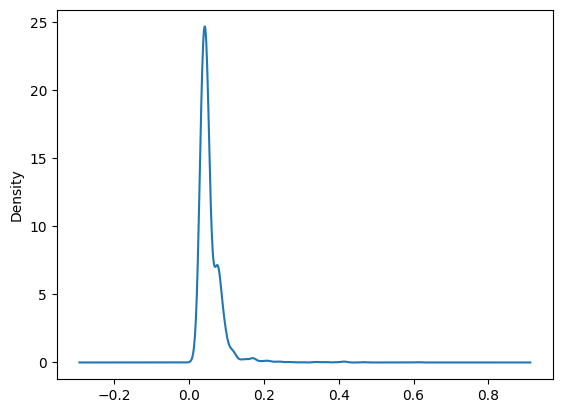

In [ ]:
df["chlorides"].plot.density()

In [ ]:
#check distribution 68-95-99 mean-sigma <=x=>mean+sigma
df[(df["chlorides"]>=(df["chlorides"].mean() - df["chlorides"].std())) &
   (df["chlorides"]<=(df["chlorides"].mean() + df["chlorides"].std()))]["chlorides"].count() / len(df["chlorides"])

0.9091888563952594

<Axes: ylabel='Density'>

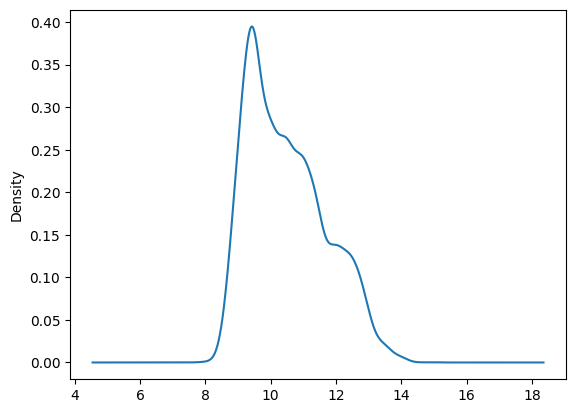

In [ ]:
df["alcohol"].plot.density()

In [ ]:
#check distribution 68-95-99 mean-sigma <=x=>mean+sigma
df[(df["alcohol"]>=(df["alcohol"].mean() - df["alcohol"].std())) &
   (df["alcohol"]<=(df["alcohol"].mean() + df["alcohol"].std()))]["alcohol"].count() / len(df["alcohol"])

0.6604586732338003

frist standard devation

In [ ]:
df[(df["alcohol"]>= df["alcohol"].mean()-2* df["alcohol"].std()) &
   (df["alcohol"]<= df["alcohol"].mean()+ 2* df["alcohol"].std())]["alcohol"].count() /len(df["alcohol"])

0.9662921348314607

2 std test

In [ ]:
df[(df["alcohol"]>= df["alcohol"].mean()-3* df["alcohol"].std()) &
   (df["alcohol"]<= df["alcohol"].mean()+ 3* df["alcohol"].std())]["alcohol"].count() /len(df["alcohol"])

0.9996921656148992

3 std test

since Alchol is passing 1,2,3 std test hence we can assume that alchol passing normal distribution test

In [ ]:
from scipy.stats import skew ,kurtosis
print(skew(df['alcohol'],axis=0 ,bias=True))
print(kurtosis(df['alcohol'],fisher=False ,axis=0 ,bias=True))

0.5655871101918292
2.467798347073691


since skewness is not 0 hence we can say that the data is skewed.
- positive value show that data is skewed to the right.
- kurtosis of normal distribution is 3 .hence alchol is ppassing kurtosis test.

In [ ]:
help(skew)

Help on function skew in module scipy.stats._stats_py:

skew(a, axis=0, bias=True, nan_policy='propagate', *, keepdims=False)
    Compute the sample skewness of a data set.

    For normally distributed data, the skewness should be about zero. For
    unimodal continuous distributions, a skewness value greater than zero means
    that there is more weight in the right tail of the distribution. The
    function `skewtest` can be used to determine if the skewness value
    is close enough to zero, statistically speaking.

    Parameters
    ----------
    a : ndarray
        Input array.
    axis : int or None, default: 0
        If an int, the axis of the input along which to compute the statistic.
        The statistic of each axis-slice (e.g. row) of the input will appear in a
        corresponding element of the output.
        If ``None``, the input will be raveled before computing the statistic.
    bias : bool, optional
        If False, then the calculations are corrected for sta

In [ ]:
#checking mean ,median and mode of alcohol
print("Mean :",df["alcohol"].mean())
print("Median :",df["alcohol"].median())
print("Mode :",df["alcohol"].mode()[0])

Mean : 10.491800831149455
Median : 10.3
Mode : 9.5


# Hypothesis Testing


In [ ]:
import warnings
warnings.filterwarnings('ignore')

<Axes: ylabel='Density'>

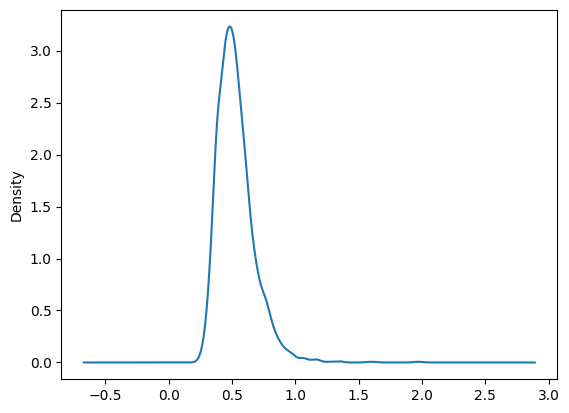

In [23]:
df["sulphates"].plot.density()

In [26]:
# Shapiro wilk's test on 'sulphates' -column
w ,p =st.shapiro(df["sulphates"])

In [32]:
if p<0.05:
    print("Sulphate columns does not fit in normal distribution")
else:
    print("Sulphate columns fit in normal distribution")


Sulphate columns fit in normal distribution


In [33]:
# getting the statistic parameters
print("w:",w)
print('p_value :' ,p)

w: nan
p_value : nan


In [35]:
#Getting the standard error =std/sqrt(n)
st.sem(df["alcohol"])

0.014797183650026738

In [30]:
#veerify
sem=df["alcohol"].std()/df["alcohol"].count()**(0.5)
print(sem)

0.014797183650026738


In [36]:
# Getting the mean of 'citri acid
df["citric acid"].mean()

0.3187218971358176

In [38]:
#interval Estimaation of population
st.norm.interval(confidence=0.095 ,loc=df["citric acid"].mean(),scale=st.sem(df["citric acid"]))

(nan, nan)

In [42]:
df["alcohol"].mean()

10.491800831149455

In [43]:
st.norm.interval(confidence=0.095 ,loc=df["alcohol"].mean(),scale=st.sem(df["alcohol"]))

(10.490034823286924, 10.493566839011985)